 ## Introduction
    In this notebook we are carrying out data cleaning and exploratory data analysis. After that, we select the

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
from sklearn.dummy import DummyClassifier
from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import (
    RandomizedSearchCV,
    cross_validate
)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import altair as alt

from scipy.stats import expon, lognorm, loguniform, randint, uniform
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("spamdata.csv",encoding =  'ISO-8859-1')
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [3]:
print('shape of the data is:', df.shape,'\n', 'Number of duplicate data is:', df.duplicated().sum())

shape of the data is: (5572, 5) 
 Number of duplicate data is: 403


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# the last three colums do not have any data, we drop them

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [6]:
# get a random sample of items to see if the last three columns are not there 

df.sample(4)

,v1,v2
4968,ham,I will cme i want to go to hos 2morow. After t...
4547,ham,Hope you are having a good week. Just checking in
1704,ham,What can i do? Might accidant tookplace betwee...
3065,spam,Get a brand new mobile phone by being an agent...


In [7]:
# renaming the columns to suit what we are doing 

df.rename(columns={'v1': 'targetVariable', 'v2': 'message'},inplace = True)

In [8]:
encoder = LabelEncoder()
df['targetVariable'] = encoder.fit_transform(df['targetVariable'])

In [9]:
df.sample(4)

,targetVariable,message
2917,0,Thanks chikku..:-) gud nyt:-*
3863,0,A pure hearted person can have a wonderful smi...
1745,0,IåÕm cool ta luv but v.tired 2 cause i have be...
933,0,What time you think you'll have it? Need to kn...


In [10]:
# removing duplicate data
df= df.drop_duplicates(keep = 'first')

In [11]:
print('shape of the data is:', df.shape,'\n', 'Number of duplicate data is:', df.duplicated().sum())

print('total sum of null values\n')
df.isnull().sum()

shape of the data is: (5169, 2) 
 Number of duplicate data is: 0
total sum of null values



targetVariable    0
message           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   targetVariable  5169 non-null   int32 
 1   message         5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


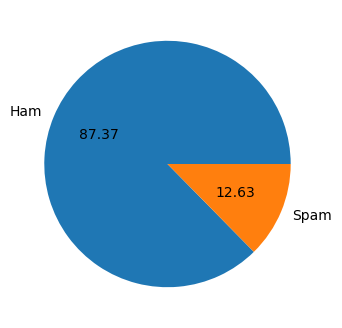

In [13]:
# let's see the count of data in the target column in a pie chart
plt.figure(figsize=(8,4))
plt.pie(df['targetVariable'].value_counts(), labels=['Ham', "Spam"], autopct ='%0.2f')
plt.show() 

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

I added three extra columns to my dataset that is character_len , word_len and sent_len.

In [15]:
# inserting column with the length of each respective text message - number of characters present

df['character_len']= df['message'].apply(len)
df.head(3)

,targetVariable,message,character_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [16]:
# getting the number of words in each message into a new column

df['word_len'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head(3)

,targetVariable,message,character_len,word_len
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [17]:
# getting the number of sentences in each sms into a new column

df['sent_len'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head(3)

,targetVariable,message,character_len,word_len,sent_len
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [18]:
df

,targetVariable,message,character_len,word_len,sent_len
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [19]:
df.describe()

,targetVariable,character_len,word_len,sent_len
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


the ABOVE table describes the average characters, words and sentences used in general in a sms according to our data

In [20]:
# Decription of data for messages that are not spam

df[df['targetVariable'] == 0 ][['word_len','sent_len', 'character_len']].describe()

,word_len,sent_len,character_len
count,4516.000000,4516.000000,4516.000000
mean,17.120903,1.799601,70.459256
std,13.493725,1.278465,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,28.000000,910.000000


In [21]:
# Description of data for messages that are spam

df[df['targetVariable'] == 1 ][['word_len','sent_len', 'character_len']].describe()

,word_len,sent_len,character_len
count,653.000000,653.000000,653.000000
mean,27.667688,2.967841,137.891271
std,7.008418,1.483201,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,8.000000,224.000000


## Illustration of patterns of interest.

        The graph below represents word_len vs count for spam and ham messages, 
        it is represented using a histogram

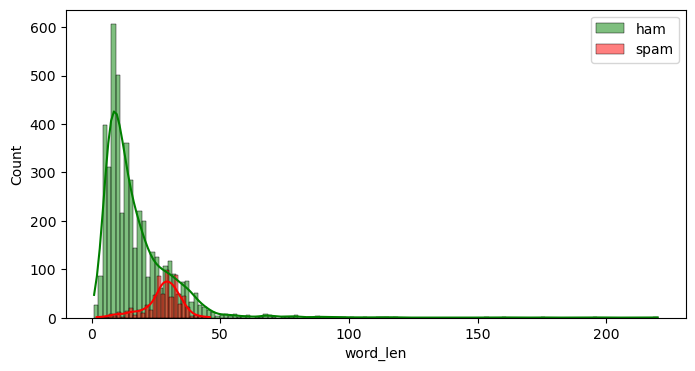

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(data= df[df['targetVariable']==0], x="word_len", color="green", label="ham", kde=True)
sns.histplot(data= df[df['targetVariable']==1], x="word_len", color="red", label="spam", kde=True)
plt.legend() 
plt.show()

        The graph below represents character_len vs count for spam and ham messages.

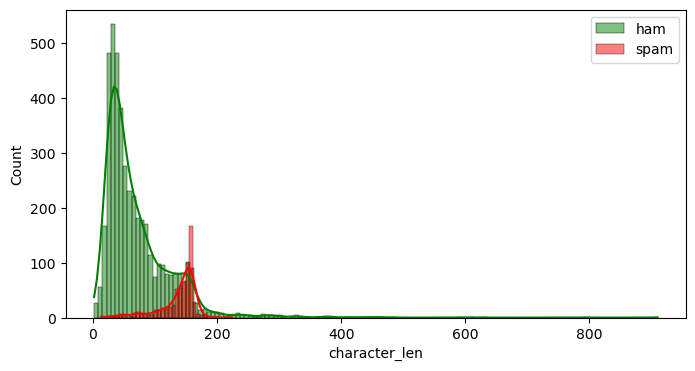

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(data= df[df['targetVariable']==0], x="character_len", color="green", label="ham", kde=True)
sns.histplot(data= df[df['targetVariable']==1], x="character_len", color="red", label="spam", kde=True)
plt.legend() 
plt.show()

array([[<AxesSubplot:title={'center':'targetVariable'}>,
        <AxesSubplot:title={'center':'character_len'}>],
       [<AxesSubplot:title={'center':'word_len'}>,
        <AxesSubplot:title={'center':'sent_len'}>]], dtype=object)

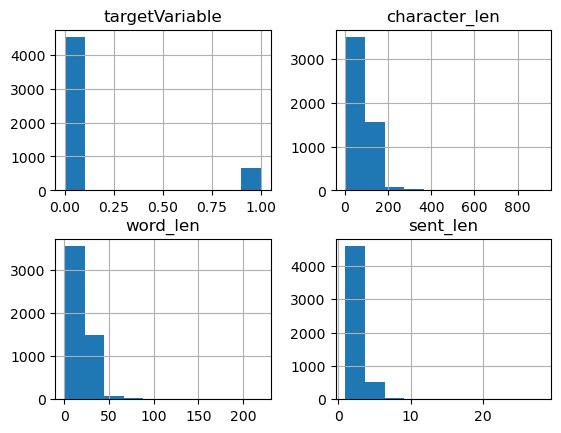

In [24]:
df.hist()

## Heatmap.

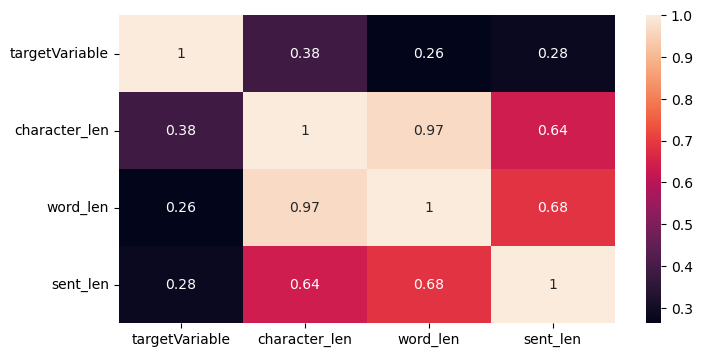

In [25]:
plt.figure(figsize=(8,4))
sns.heatmap(data=df.corr(),annot= True)
plt.show()

## Boxplot.

{'whiskers': [<matplotlib.lines.Line2D at 0x213fb5b27f0>,
 'caps': [<matplotlib.lines.Line2D at 0x213fb5b2d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x213fb5b2520>],
 'medians': [<matplotlib.lines.Line2D at 0x213fb5c2370>],
 'fliers': [<matplotlib.lines.Line2D at 0x213fb5c2640>],
 'means': []}

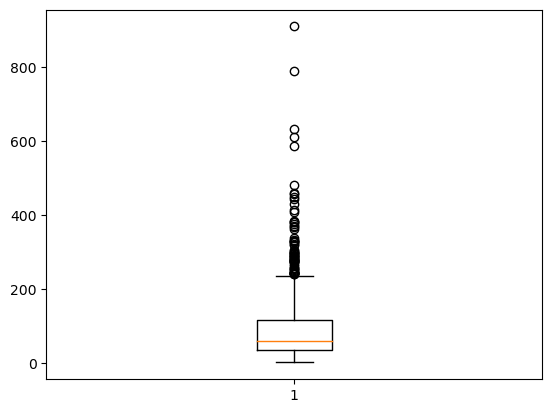

In [26]:
plt.boxplot(df.character_len)

## Correlation matrix.

In [27]:
corr_matrix = df.corr()
print(corr_matrix)

                targetVariable  character_len  word_len  sent_len
targetVariable        1.000000       0.384717  0.262984  0.284901
character_len         0.384717       1.000000  0.965770  0.638143
word_len              0.262984       0.965770  1.000000  0.684541
sent_len              0.284901       0.638143  0.684541  1.000000


## Split the data into the train set and test set.

In [28]:
train_df, test_df = train_test_split(df, test_size=0.2)

train_df

,targetVariable,message,character_len,word_len,sent_len
5130,0,Any way where are you and what doing.,37,9,1
4322,0,Aight well keep me informed,27,5,1
160,0,Keep yourself safe for me because I need you a...,115,25,1
5192,0,Oh oh... Den muz change plan liao... Go back h...,69,17,1
2059,0,He didn't see his shadow. We get an early spri...,52,13,2
...,...,...,...,...,...
2131,0,S...from the training manual it show there is ...,113,24,1
1059,1,EASTENDERS TV Quiz. What FLOWER does DOT compa...,153,33,3
53,0,Wow. I never realized that you were so embaras...,291,69,6
1446,0,Looks like u wil b getting a headstart im leav...,159,33,1


In [29]:
train_df.shape

(4135, 5)

In [30]:
pd.DataFrame(df['targetVariable'].value_counts(normalize=True), index=None)

,targetVariable
0,0.87367
1,0.12633


Of the 4135 training example texts, 87.3 % is ham and only 12.6 is spam. 

### Text transformation using CountVectorizer.

In [31]:
X_train, y_train = train_df['message'], train_df['targetVariable']
X_test, y_test = test_df['message'], test_df['targetVariable']

- We transform our text column using sklearn's CountVectorizer.
- CountVectorizer is used for calculating the individual word count in the text.
- We use two parameters of CountVectorizer which are:
1. max_features limits the number of distinct individual tokens/words we want to be counted.
2. stop_words=english eliminates the common English words like is, a, the, etc.

Ultimately, we fit and tranform the data to observe the columns of the transformed data.
get_feature_names is used to extract the word names of the top 1000 occuring max_features.

In [32]:
vec = CountVectorizer(max_features=1000, stop_words='english')

X_counts = vec.fit_transform(X_train)
bow_sms = pd.DataFrame(
    X_counts.toarray(), columns=vec.get_feature_names_out(), index=X_train
)
bow_sms

,000,02,03,04,06,08000839402,08000930705,0870,08712460324,10,...,yest,yesterday,yo,yoga,yr,yrs,yup,ì_,ìï,û_
message,,,,,,,,,,,,,,,,,,,,,
Any way where are you and what doing.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aight well keep me informed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Keep yourself safe for me because I need you and I miss you already and I envy everyone that see's you in real life,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Oh oh... Den muz change plan liao... Go back have to yan jiu again...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
He didn't see his shadow. We get an early spring yay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S...from the training manual it show there is no tech process:)its all about password reset and troubleshooting:),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EASTENDERS TV Quiz. What FLOWER does DOT compare herself to? D= VIOLET E= TULIP F= LILY txt D E or F to 84025 NOW 4 chance 2 WIN å£100 Cash WKENT/150P16+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Wow. I never realized that you were so embarassed by your accomodations. I thought you liked it, since i was doing the best i could and you always seemed so happy about \the cave\"". I'm sorry I didn't and don't have more to give. I'm sorry i offered. I'm sorry your room was so embarassing.""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
bow_sms.shape

(4135, 1000)

In [34]:
visualize_sms = bow_sms.T
visualize_sms['length'] = visualize_sms.sum(axis=1)
visualize_sms = pd.DataFrame(visualize_sms.loc[:, 'length']).reset_index()
visualize_sms = visualize_sms.sort_values(['length'], ascending=False)

import altair as alt
alt.Chart(visualize_sms.iloc[0:20,:]).mark_bar().encode(
y=alt.Y('index', sort='x'),
x='length')

alt.Chart(...)

## Model Building.
- We have defined two scoring metrics; accuracy and ROC-AUC score for assessing the model.

In [35]:
# We are first training our model using the DummyClassifier from sklearn.
dummy_model = DummyClassifier(strategy='prior')
dummy_model.fit(X_train, y_train)

scoring_metrics = ["accuracy", "roc_auc"]

results = pd.DataFrame(cross_validate(dummy_model, X_train, y_train, return_train_score=True, scoring=scoring_metrics))
pd.DataFrame(results.mean()).T

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc
0,0.0016,0.004767,0.874728,0.874728,0.5,0.5


We get 87.47% training accuracy and 87.47% testing accuracy. The scores are almost the same maybe due to the ratio of spam and non-spam messages being evenly distributed between train and testing sets.

In [36]:
pipe = make_pipeline(CountVectorizer(stop_words='english', max_features=1000), LogisticRegression())
pipe.fit(X_train, y_train)

results = pd.DataFrame(cross_validate(pipe, X_train, y_train, return_train_score=True, scoring=scoring_metrics))
pd.DataFrame(results.mean()).T

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc
0,0.130546,0.042443,0.977025,0.988936,0.985786,0.998662


Using CountVectorizer with stop_words='english' and max_features=1000 and Logistic Regression, we get 98.89% training accuracy and 97.70% validation accuracy. We get better train and testing scores with Logistic Regression in comparison to DummyClassifier.

### Hyperparameter tuning.

We actually have two different sets of hyperparamters(total 4):
1. CountVectorizer has two: **max_features** and **stop_words**.
2. We use two for Logisitic Regression: 
    * **C**: C is regularization parameter and the strength of the regularization is inversely proportional to C. Must be strictly positive.
    * **penalty**: We will be using two choices here: 
        1. `l2` : add a L2 penalty term and it is the default choice
        2. `l1` : which is L1 penalty which can be used to reduce sparse data features. 

####  Making a grid of different hyperparameter values.

In [37]:
X_train

5130                Any way where are you and what doing.
4322                          Aight well keep me informed
160     Keep yourself safe for me because I need you a...
5192    Oh oh... Den muz change plan liao... Go back h...
2059    He didn't see his shadow. We get an early spri...
                              ...                        
2131    S...from the training manual it show there is ...
1059    EASTENDERS TV Quiz. What FLOWER does DOT compa...
53      Wow. I never realized that you were so embaras...
1446    Looks like u wil b getting a headstart im leav...
4470              Wa... U so efficient... Gee... Thanx...
Name: message, Length: 4135, dtype: object

In [38]:
pipe_lr = make_pipeline(CountVectorizer(), LogisticRegression())

param_dists = {
    "countvectorizer__max_features": randint(low=100, high=2000),
    "countvectorizer__stop_words": ['english', None],
    "logisticregression__C": loguniform(1e-3, 1e3),
    "logisticregression__class_weight": ['balanced', None],
    "logisticregression__max_iter": np.arange(500, 2000, 50)
}

### Using Randomized Search to get the best hyperparameter values.

- RandomizedSearch is better than using GridSearch because of the randomness attached to the selection of hyperparameter values over a range.
- Explanation of the arguments used:
    1. n_iter: number of different sets of hyperparameter values to be run/ iterations to be done.
    2. n_jobs: setting it to -1 allows multiple cores of computers to run different iterations simultaneously.
    3. refit: this is one of the elements from the scoring list (['accuracy', 'roc_auc']), which is to be used to rank the best model.

In [39]:
model_random = RandomizedSearchCV(
        pipe_lr,
        param_dists,
        n_iter=50,
        n_jobs=-1,
        random_state=2018,
        return_train_score=True,
        scoring=scoring_metrics,
        refit="roc_auc"
    )
model_random.fit(X_train, y_train);

In [40]:
results = pd.DataFrame(model_random.cv_results_)
results = results.loc[:, ['param_countvectorizer__max_features', 'param_countvectorizer__stop_words',
                          'param_logisticregression__C', 'param_logisticregression__class_weight',
                          'param_logisticregression__max_iter', 'mean_train_roc_auc', 'mean_test_roc_auc',
                          'mean_train_accuracy', 'mean_test_accuracy', 'rank_test_roc_auc']] 
results.sort_values(by='mean_test_roc_auc', ascending=False).T

,13,20,10,5,49,24,35,36,16,28,...,34,18,15,46,38,9,44,42,25,12
param_countvectorizer__max_features,1959,1629,1411,1755,1933,1061,1421,1435,1061,1875,...,228,1962,1941,930,223,209,127,1033,1127,122
param_countvectorizer__stop_words,english,english,english,english,english,english,None,None,english,None,...,english,None,english,None,None,None,english,None,None,None
param_logisticregression__C,1.428699,0.903959,0.264523,4.581116,0.076452,0.868685,0.852521,1.078682,10.183319,0.065032,...,277.461474,0.002799,608.735955,0.002949,0.00378,79.335113,0.012252,0.001229,0.001043,0.001618
param_logisticregression__class_weight,None,None,None,None,None,balanced,None,None,None,balanced,...,balanced,None,balanced,None,balanced,None,balanced,None,None,balanced
param_logisticregression__max_iter,1100,900,1100,1500,1250,1150,650,500,1400,1300,...,1750,700,1950,1400,700,1150,1300,1000,750,600
mean_train_roc_auc,0.999433,0.999107,0.997481,0.99955,0.9948,0.99906,0.998849,0.998957,0.999291,0.99716,...,0.996945,0.971435,0.99997,0.970525,0.970996,0.997439,0.966845,0.964788,0.964082,0.951834
mean_test_roc_auc,0.987425,0.987271,0.987007,0.986803,0.986333,0.985535,0.985251,0.985126,0.984594,0.984328,...,0.967531,0.967022,0.966814,0.966678,0.965933,0.965312,0.963305,0.960894,0.960136,0.947425
mean_train_accuracy,0.993712,0.990568,0.980351,0.998549,0.96445,0.995889,0.992987,0.994317,0.998549,0.985006,...,0.981258,0.877146,0.999516,0.87757,0.950363,0.990689,0.96052,0.874728,0.874728,0.923821
mean_test_accuracy,0.978718,0.977993,0.970496,0.980411,0.955985,0.981378,0.980169,0.980653,0.981378,0.975816,...,0.958888,0.876663,0.970979,0.877388,0.946554,0.967836,0.957195,0.874728,0.874728,0.919468
rank_test_roc_auc,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50


###  Visualizing all the models trained by Randomized Search.

In [41]:
roc_auc_plot = alt.Chart(results,
          title='Distribution of ROC-AUC score basis hyperparameters'
          ).mark_point().encode(
    x=alt.X('param_countvectorizer__max_features',
            title='max_features'),
    y=alt.Y('mean_test_roc_auc',
            title='ROC-AUC Validation score',
            scale=alt.Scale(zero=False)),
    color=alt.Color('param_logisticregression__C',
                    title='C',
                    scale=alt.Scale(reverse=True)),
    size=alt.Size('param_logisticregression__max_iter',
                  title='max_iter'))

accuracy_plot = alt.Chart(results,
          title='Distribution of Accuracy score basis hyperparameters'
          ).mark_point().encode(
    x=alt.X('param_countvectorizer__max_features',
            title='max_features'),
    y=alt.Y('mean_test_accuracy',
            title='Accuracy Validation score',
            scale=alt.Scale(zero=False)),
    color=alt.Color('param_logisticregression__C',
                    title='C',
                    scale=alt.Scale(reverse=True)),
    size=alt.Size('param_logisticregression__max_iter',
                  title='max_iter'))

accuracy_plot | roc_auc_plot

alt.HConcatChart(...)

In [42]:
best_model = model_random.best_estimator_

final_results = dict(results.sort_values(['rank_test_roc_auc']).reset_index(drop=True).iloc[0,:])
for key, value in final_results.items():
    print(f"{key}: {value}")
    

param_countvectorizer__max_features: 1959
param_countvectorizer__stop_words: english
param_logisticregression__C: 1.428699391759822
param_logisticregression__class_weight: None
param_logisticregression__max_iter: 1100
mean_train_roc_auc: 0.9994327430643668
mean_test_roc_auc: 0.9874253795352466
mean_train_accuracy: 0.9937122128174124
mean_test_accuracy: 0.9787182587666263
rank_test_roc_auc: 1


# Validation on the test set

In [43]:
model_random.score(X_test, y_test)

0.9901536686853706

Final model score on the test data is 99.01%.